In [22]:
!pip install numpy pandas matplotlib seaborn imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


# <u>GPA vs. Study Hours (Project 3)</u>

## What is Regression? 
1) Linear regression is a statistical method used to model the relationship between one or more independent variables and a dependent variable. It helps us understand if there is a relationship between these variables.
2) <b>Two types of Linear Regression:</b>
- Simple Linear Regression: there is only one independent variable.
- Multiple Linear Regression : There are two or more independent variables.

3) You can help solve linear regression by using a formula to find the best fitting line (also called the regression line). It is represented by the forumla below:

y = b0 + b1X + e

## What is the problem?
Most the time, colleges will address academic performance overall by using the Grade Point Average (GPA). This can be linked to a students success in the educational environment. We hope to understand the relationship between the amount of study hours a student does and compare it to the overall GPA they receive. We are hoping to identify patterns and conduct analysis using regression and other techniques in this project to address some of the questions below.

## Questions we are trying to answer?

1. **Is there a strong relationship between the number of study hours and a higher GPA?**

2. **What is the minimum number of study hours typically associated with a GPA above 3.5?**

3. **Are there any unexpected patterns in the data, such as high GPAs with minimal study hours?**

## Introducing the Data 
For this project, I found a dataset on Kaggle that explores the relationship between GPA and study hours. You can directly view or download the dataset by clicking <a href="https://www.kaggle.com/code/shiivvvaam/gpa-v-s-study-hours/" id="url" runat="server">HERE</a>. This dataset provides a simple yet insightful look at how study time might relate to academic performance, as measured by GPA. 

### Dataset Information:
This dataset contains 2 columns, both numerical, representing a total of 193 entries. The columns in the dataset are as follows:
- GPA (Numerical): This scale based off my experience is from 0.0 to 4.0. We have one entry with 4.3 that we will remove later. 
- Study_Hours (Numerical) : The hours students reportedly studied that range from 2 to 69 hours.

In [23]:
import pandas as pd

### Import and read the dataset that I am using for this project.

In [24]:
df = pd.read_csv("gpa_study_hours.csv")

### Checking using the df.head() command to make sure that the dataset was properly imported into the project file.

In [25]:
df.head()

,gpa,study_hours
0,4.00,10.0
1,3.80,25.0
2,3.93,45.0
3,3.40,10.0
4,3.20,4.0


### Checking the column names, and showing the data type that each column has.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gpa          193 non-null    float64
 1   study_hours  193 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB


### Checking to see if there are any missing values in the data set that may cause issues later on when we do the experiments.

In [27]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 gpa            0
study_hours    0
dtype: int64


### Checking the outliers based on normal GPA standards (0-4.0) and anything over 100 hours of studying.

In [28]:
outliers_gpa = df[(df['gpa'] > 4.0) | (df['gpa'] < 0)]
outliers_hours = df[(df['study_hours'] < 0) | (df['study_hours'] > 100)]
print("\nGPA outliers:\n", outliers_gpa)
print("\nStudy hours outliers:\n", outliers_hours)


GPA outliers:
     gpa  study_hours
79  4.3         10.0

Study hours outliers:
 Empty DataFrame
Columns: [gpa, study_hours]
Index: []


### As we can see above, there is one row that is outside the outliers that we have identified for this project. We will clean the data and remove this row from the data set. This aso includes the mean, STD, min, max, median, and the 25th and 75th percentiles for better understanding of the data set.

In [29]:
df_cleaned = df[(df['gpa'] <= 4.0) & (df['gpa'] >= 0)]
df_cleaned = df_cleaned[(df_cleaned['study_hours'] >= 0) & (df_cleaned['study_hours'] <= 100)]
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)
print("\nSummary statistics after removing outliers:\n", df_cleaned.describe())

Original shape: (193, 2)
Cleaned shape: (192, 2)

Summary statistics after removing outliers:
               gpa  study_hours
count  192.000000   192.000000
mean     3.582448    17.515625
std      0.281504    11.425940
min      2.600000     2.000000
25%      3.400000    10.000000
50%      3.615000    15.000000
75%      3.800000    20.000000
max      4.000000    69.000000


In [30]:
import seaborn as sns

### Creating a Pairplot to see the two variables (GPA vs. Study Hours) and seeing the trends/patterns in visual form.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


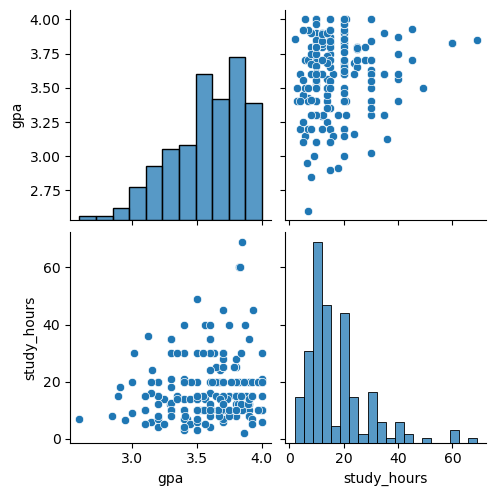

In [31]:
sns.pairplot(df_cleaned)

## Summary of Graph Above :

# Top Left: 
- This histogram shows the distribution of GPA's, with a majority being between 3.2 and 4.0. There seems to be a peak around the 3.6 range. However, there are a few below 3.0 
# Top Right 
- This scatter plot shows the GPA (x-axis) against the study hours (y-axis), there really isnt a noticeable trend between the two variables. A noticing observation is that many of the students are between 3.2-4.0 have study hours that are between 0-25 hours. 
# Bottom Left: 
- This scatter plot shows the study hours (x-axis) against the GPA (y-axis). Essentially this just shows the change of the axis with the variables. It can kind of confirm that there really isnt a strong relationship between the two variables.
# Bottom Right: 
- This histogram displays the distribution of study hours, with most being (like mentioned previously) between 0-30 with a significant peak in the 10-20 hour range. There are a few students that go beyond 30 hours.

### Finding the correlation between the variables. Having a .133 shows a weak positive relationship that could show that there might not be a big correlation between the two variables.

In [32]:
correlation = df['gpa'].corr(df['study_hours'])
print("Correlation between GPA and study hours:", correlation)

Correlation between GPA and study hours: 0.1330137774213701


### Put s the study hours in bins, this will help us determine (show) the average GPA that students have when they study between a certain amount of hours. The hour were adjusted by 10s.

In [33]:
bins = [0, 10, 20, 30, 40, 50, 60, 70]
df['hours_bin'] = pd.cut(df['study_hours'], bins)
avg_gpa_by_bin = df.groupby('hours_bin')['gpa'].mean()
print("\nAverage GPA by study hour range:\n", avg_gpa_by_bin)



Average GPA by study hour range:
 hours_bin
(0, 10]     3.558736
(10, 20]    3.590267
(20, 30]    3.612750
(30, 40]    3.546273
(40, 50]    3.710000
(50, 60]    3.828333
(60, 70]    3.850000
Name: gpa, dtype: float64


## Experiment 1: Modeling (Linear Regression)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
X = df_cleaned[['study_hours']]
y = df_cleaned['gpa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

Intercept (b0): 3.514168436648366
Slope (b1): 0.0037847309699082865


## Interpretation of Linear Regression Model
- For Experiment 1, I built a linear regression model to see how study hours impact GPA, and it gave me this equation: GPA = 3.514 + 0.00378 * study_hours. The intercept (b0 = 3.514) is what the model predicts my GPA would be if I didn’t study at all, which is pretty solid since the average GPA in my cleaned dataset is around 3.582. It’s cool to see that a lot of students are holding steady academically even with low study hours. The slope (b1 = 0.00378) shows how much GPA goes up per extra hour of studying—for example, 10 more hours only adds about 0.038 to my GPA, which is tiny. That lines up with the weak correlation I found earlier (0.133), so it seems like study hours don’t make a huge difference here.

## Experiment 1: Evaluation

Mean Squared Error (MSE): 0.06847400514390602
Root Mean Squared Error (RMSE): 0.26167538123389833
R-squared (R²): -0.002841606968649435


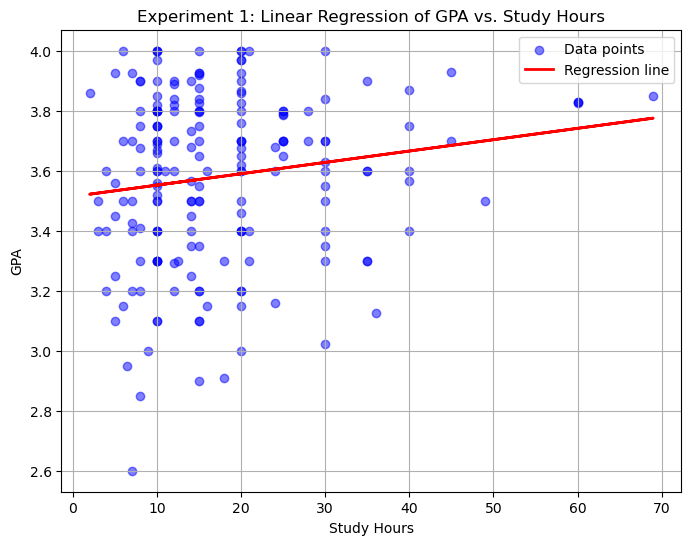

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

y_test_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)  
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_test_pred)  

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['study_hours'], df_cleaned['gpa'], color='blue', alpha=0.5, label='Data points')
plt.plot(df_cleaned['study_hours'], y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Study Hours')
plt.ylabel('GPA')
plt.title('Experiment 1: Linear Regression of GPA vs. Study Hours')
plt.legend()
plt.grid(True)
plt.show()

## Evaulation of Linear Regression: 

- To check how well my model did, I looked at some metrics using the test set. The Mean Squared Error (MSE) was 0.0685, which is the average of the squared differences between my predicted GPAs and the real ones—kind of a raw error measure. The Root Mean Squared Error (RMSE) came out to 0.262, which puts that error into GPA points, meaning my predictions are typically off by about 0.262. With GPAs ranging from 2.6 to 4.0 (a 1.4-point spread), that’s not awful but not super precise either—it’s roughly 19% of the range. The R-squared (R²) value of -0.0028 was a surprise—it’s basically zero and even negative, meaning my model doesn’t explain much of why GPAs vary and might be worse than just guessing the average GPA every time. That fits with the weak link I saw before.

- These results tie into the questions I started with. The small slope (0.00378) and near-zero R² (-0.0028) show there’s not a strong connection between more study hours and a higher GPA (Question 1)—the effect is so small it’s almost meaningless. The RMSE of 0.262 means my predictions aren’t steady enough to nail down how many hours I’d need for a GPA above 3.5 (Question 2). The model says I’d get 3.514 with no studying, but that error range (±0.262) makes it hard to be sure. For Question 3, the high intercept (3.514) and the scattered points in my plot point to some interesting patterns—like how some students pull off 3.8 or 4.0 GPAs with just 2–10 hours, while others study 40–60 hours and don’t do much better. It’s probably more about how they study or other stuff going on, and this basic model isn’t picking that up.

## Experiment 2: 

In [1]:

from sklearn.linear_model import LogisticRegression


df_cleaned['high_gpa'] = (df_cleaned['gpa'] >= 3.5).astype(int)


X_logistic = df_cleaned[['study_hours']]
y_logistic = df_cleaned['high_gpa']


X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42, stratify=y_logistic)

model_logistic = LogisticRegression()
model_logistic.fit(X_log_train, y_log_train)


print("Experiment 2 - Intercept (b0):", model_logistic.intercept_[0])
print("Experiment 2 - Slope (b1):", model_logistic.coef_[0][0])


y_log_test_pred = model_logistic.predict(X_log_test)


accuracy = accuracy_score(y_log_test, y_log_test_pred)
print("Experiment 2 - Accuracy:", accuracy)


print("Experiment 2 - Classification Report:\n", classification_report(y_log_test, y_log_test_pred))


X_range = pd.DataFrame(np.linspace(X_logistic.min(), X_logistic.max(), 100), columns=['study_hours'])
y_prob = model_logistic.predict_proba(X_range)[:, 1]  # Probability of GPA >= 3.5
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['study_hours'], df_cleaned['high_gpa'], color='purple', alpha=0.5, label='Data points')
plt.plot(X_range, y_prob, color='green', linewidth=2, label='Logistic curve')
plt.xlabel('Study Hours')
plt.ylabel('Probability of GPA >= 3.5')
plt.title('Experiment 2: Logistic Regression for High GPA (Stratified)')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'df_cleaned' is not defined

## Experiment 3:

## Impact Section

## Conclusion

## References
- Kaggle dataset https://www.kaggle.com/code/shiivvvaam/gpa-v-s-study-hours/
- Scikit-learn LinearRegression docs: https://scikit learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Various Canvas Demo's taught in class to reference
- Canvas Guides on Matplotlib
- Canvas Guides on Numpy